<a href="https://colab.research.google.com/github/TriPhan15/K-Means_K-NN/blob/main/K-Means_K-NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== CHƯƠNG TRÌNH DEMO HỌC MÁY (K-Means & K-NN) ===
1. Chạy K-Means (Phân cụm)
2. Chạy K-NN (Phân loại)
3. Thoát
Mời bạn chọn chức năng (1-3): 1

--- CHỌN NGUỒN DỮ LIỆU ---
1. Tự sinh dữ liệu ngẫu nhiên (Random)
2. Tải file CSV từ máy tính (Colab Upload)
Chọn (1 hoặc 2): 1
Đang tạo dữ liệu ngẫu nhiên...
Nhập số cụm K muốn chia: 2

--- BẮT ĐẦU HUẤN LUYỆN K-MEANS (K=2) ---

>> Bước lặp 1:
   Vị trí tâm cũ: 
[[-2.24  9.79]
 [-2.46  7.87]]
   Vị trí tâm mới: 
[[-2.57  9.59]
 [-3.53  1.84]]

>> Bước lặp 2:
   Vị trí tâm cũ: 
[[-2.57  9.59]
 [-3.53  1.84]]
   Vị trí tâm mới: 
[[-5.41  8.22]
 [-1.62 -1.92]]

>> Bước lặp 3:
   Vị trí tâm cũ: 
[[-5.41  8.22]
 [-1.62 -1.92]]
   Vị trí tâm mới: 
[[-5.74  8.1 ]
 [-1.07 -2.41]]

>> Bước lặp 4:
   Vị trí tâm cũ: 
[[-5.74  8.1 ]
 [-1.07 -2.41]]
   Vị trí tâm mới: 
[[-5.74  8.1 ]
 [-1.07 -2.41]]
-> K-Means đã hội tụ sau 4 bước.
--------------------------------------------------


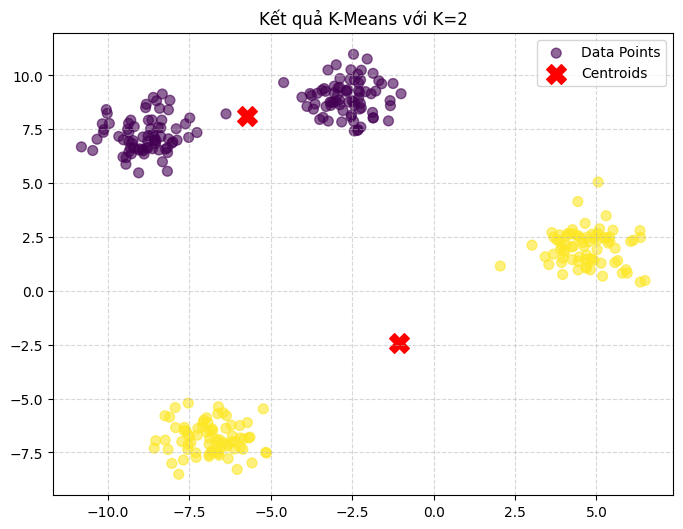

KeyboardInterrupt: Interrupted by user

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from IPython.display import clear_output
import sys
import io


# PHẦN 1: CLASS K-MEANS (Học không giám sát)

class KMeansClustering:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centers = None
        self.labels = None

    def init_centers(self, X):
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[idx]

    def assign_labels(self, X, centers):
        D = cdist(X, centers)
        return np.argmin(D, axis=1)

    def update_centers(self, X, labels):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            Xk = X[labels == k, :]
            if len(Xk) > 0:
                centers[k, :] = np.mean(Xk, axis=0)
            else:
                centers[k, :] = self.centers[k, :]
        return centers

    def has_converged(self, old_centers, new_centers):
        return (set([tuple(a) for a in old_centers]) ==
                set([tuple(a) for a in new_centers]))

    def fit(self, X):
        print(f"\n--- BẮT ĐẦU HUẤN LUYỆN K-MEANS (K={self.n_clusters}) ---")
        self.centers = self.init_centers(X)
        self.labels = np.zeros(X.shape[0])

        for i in range(self.max_iter):
            print(f"\n>> Bước lặp {i+1}:")
            old_centers = self.centers

            # Gán nhãn
            self.labels = self.assign_labels(X, self.centers)

            # Cập nhật tâm
            self.centers = self.update_centers(X, self.labels)

            # In chi tiết thay đổi để hiểu step-by-step
            print(f"   Vị trí tâm cũ: \n{np.round(old_centers, 2)}")
            print(f"   Vị trí tâm mới: \n{np.round(self.centers, 2)}")

            if self.has_converged(old_centers, self.centers):
                print(f"-> K-Means đã hội tụ sau {i+1} bước.")
                break
        print("--------------------------------------------------")

    def plot_result(self, X):
        plt.figure(figsize=(8, 6))
        plt.title(f'Kết quả K-Means với K={self.n_clusters}')
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, s=50, cmap='viridis', label='Data Points', alpha=0.6)
        plt.scatter(self.centers[:, 0], self.centers[:, 1], c='red', s=200, marker='X', label='Centroids')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


# PHẦN 2: CLASS K-NN (Học có giám sát)

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test, verbose=False):
        num_test = X_test.shape[0]
        y_pred = np.zeros(num_test)

        for i in range(num_test):
            # 1. Tính khoảng cách
            distances = np.sqrt(np.sum((self.X_train - X_test[i, :])**2, axis=1))

            # 2. Lấy K láng giềng
            k_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y_train[k_indices]
            k_nearest_dists = distances[k_indices]

            # 3. In giải thích (Step-by-step)
            if verbose:
                print(f"\n>> Đang phân loại điểm {X_test[i]}:")
                print(f"   {self.k} láng giềng gần nhất có index: {k_indices}")
                print(f"   Khoảng cách tương ứng: {np.round(k_nearest_dists, 2)}")
                print(f"   Nhãn của láng giềng: {k_nearest_labels}")

            # 4. Bầu chọn
            counts = np.bincount(k_nearest_labels.astype(int))
            y_pred[i] = np.argmax(counts)

            if verbose:
                print(f"-> Kết quả bầu chọn: Class {int(y_pred[i])}")

        return y_pred

    def plot_result(self, X_test, y_pred, point_new=None):
        plt.figure(figsize=(8, 6))
        plt.title(f'Kết quả phân loại K-NN với K={self.k}')
        plt.scatter(self.X_train[:, 0], self.X_train[:, 1], c=self.y_train, s=50, cmap='viridis', alpha=0.6, label='Training Data')

        if point_new is not None:
            plt.scatter(point_new[:, 0], point_new[:, 1], c='red', s=200, marker='*', label='New Point')
            plt.annotate(f"Dự đoán: Lớp {int(y_pred[0])}",
                         (point_new[0,0], point_new[0,1]),
                         xytext=(15,15), textcoords='offset points',
                         bbox=dict(boxstyle="round", fc="w"))

        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()


# PHẦN 3: HÀM HỖ TRỢ (Xử lý File & Data)

def get_data_input():
    print("\n--- CHỌN NGUỒN DỮ LIỆU ---")
    print("1. Tự sinh dữ liệu ngẫu nhiên (Random)")
    print("2. Tải file CSV từ máy tính (Colab Upload)")
    choice = input("Chọn (1 hoặc 2): ")

    if choice == '1':
        return 'random', None
    elif choice == '2':
        print("\nVui lòng chọn file CSV từ máy tính...")
        try:
            from google.colab import files
            uploaded = files.upload()
            if not uploaded:
                return None, None
            filename = next(iter(uploaded))
            # Đọc file bằng pandas
            df = pd.read_csv(io.BytesIO(uploaded[filename]))
            print(f"Đã tải file: {filename}")
            print(df.head())

            X = df.iloc[:, :2].values

            # Nếu có cột thứ 3 thì lấy làm y, không thì None
            y = df.iloc[:, 2].values if df.shape[1] > 2 else None
            return 'file', (X, y)

        except ImportError:
            print("Lỗi: Không thể dùng tính năng upload ngoài Colab/Jupyter.")
            return None, None
        except Exception as e:
            print(f"Lỗi đọc file: {e}")
            return None, None
    else:
        return None, None


# PHẦN 4: MENU ĐIỀU KHIỂN (Main)
def main():
    while True:
        clear_output(wait=True)
        print("\n=== CHƯƠNG TRÌNH DEMO HỌC MÁY (K-Means & K-NN) ===")
        print("1. Chạy K-Means (Phân cụm)")
        print("2. Chạy K-NN (Phân loại)")
        print("3. Thoát")

        choice = input("Mời bạn chọn chức năng (1-3): ")

        if choice == '1':
            source, data = get_data_input()

            if source == 'random':
                print("Đang tạo dữ liệu ngẫu nhiên...")
                X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.8, random_state=42)
            elif source == 'file':
                X, _ = data
            else:
                input("Lựa chọn không hợp lệ hoặc lỗi file. Nhấn Enter để quay lại.")
                continue

            try:
                k_input = int(input("Nhập số cụm K muốn chia: "))
                model = KMeansClustering(n_clusters=k_input)
                model.fit(X) # Đã thêm print step-by-step bên trong
                model.plot_result(X)
            except ValueError:
                print("Lỗi nhập liệu!")

        elif choice == '2':
            source, data = get_data_input()

            if source == 'random':
                X, y = make_blobs(n_samples=200, centers=3, cluster_std=1.0, random_state=42)
            elif source == 'file':
                X, y = data
                if y is None:
                    print("File CSV cần có ít nhất 3 cột (2 feature, 1 label) để chạy K-NN.")
                    input("Nhấn Enter để quay lại.")
                    continue
            else:
                input("Quay lại menu chính...")
                continue

            # Chia train/test
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            try:
                k_input = int(input("Nhập số láng giềng K: "))
                knn = KNNClassifier(k=k_input)
                knn.fit(X_train, y_train)

                print("\n--- NHẬP ĐIỂM CẦN DỰ ĐOÁN ---")
                x_coord = float(input("Nhập x: "))
                y_coord = float(input("Nhập y: "))
                new_point = np.array([[x_coord, y_coord]])

                prediction = knn.predict(new_point, verbose=True)

                knn.plot_result(X_test, prediction, point_new=new_point)

            except ValueError:
                print("Dữ liệu nhập không hợp lệ.")

        elif choice == '3':
            print("Kết thúc chương trình. Hẹn gặp lại!")
            break

        input("\n>>> Nhấn Enter để quay về menu chính...")

if __name__ == "__main__":
    main()